# U-Net (Encoder-Decoder  + skip Connection)

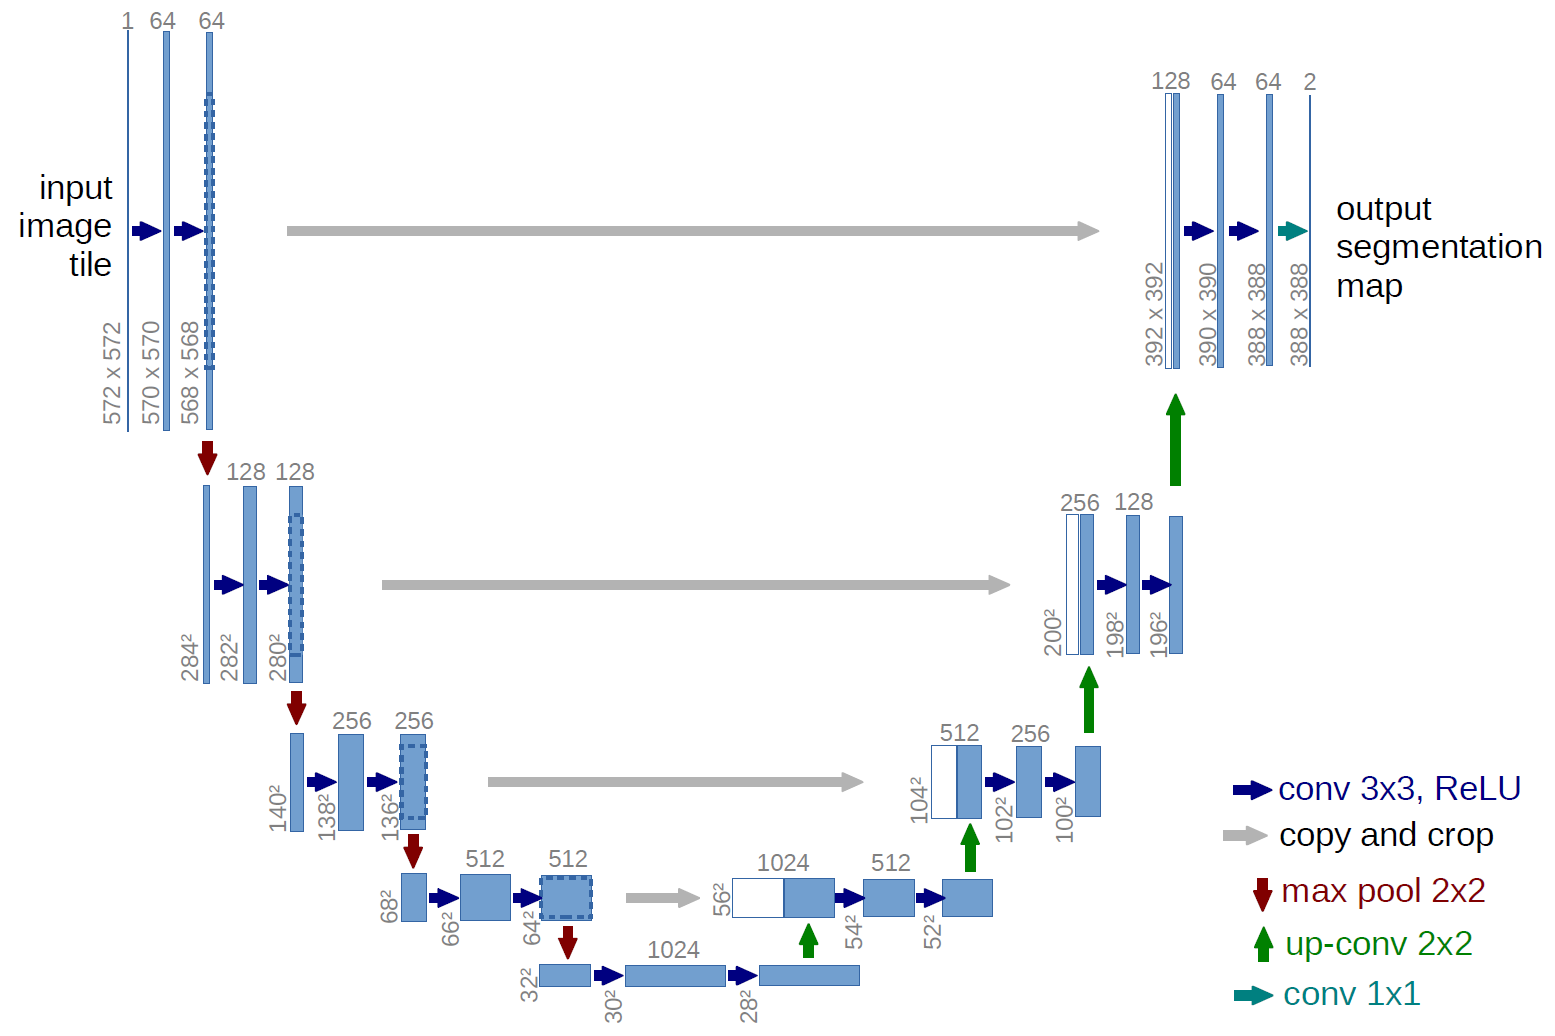

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import backend as k
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import cv2
from sklearn.model_selection import train_test_split

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
def conv_block(x, filters, kernel_size=3, batch_norm=True):
    #### Insert your coder here ####
    #First conv block


    #Second conv block


    return c



In [3]:
#Encoder
def encoder_block(x, filters, pool_size=(2,2), dropout=0.0):
    #### Insert your coder here : use conv_block ####

    return c, p

In [2]:
#Decoder
def decoder_block(x, skip, filters, kernel_size=3, dropout=0.0):
    #### Insert your coder here : use conv_block ####
    # Conv2DTranspose


    # concatenate skip connection

    return d

# Build a U-Net model.

In [5]:
def UNet(input_shape=(256, 256, 3), num_classes=1, base_filters=64, dropout=0.0, batch_norm=True):
    #Input
    inputs = layers.Input(shape=input_shape)
    # Encoder
    #### Insert your coder here : use encodre_block ####

    #Bridge
    b = conv_block(p4, base_filters*16)

    #Deconder
    #### Insert your coder here : sue decoder_block ####



    #Output
    if num_classes == 1:
        activation = ''
    else:
        activation = '' #Multiclass
    #Output layer

    #Create model

    #return the model U-Net
    return model


# Losses and Metrics

In [ ]:
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    # Flatten data to one dimenstion
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)

    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


In [ ]:
def dict_loss(y_true, y_perd):
    return 1.0 - dice_coefficient(y_true, y_perd)

In [ ]:
# IoU Metric (Custom Metric)
def iou_metric(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)

    intersection = K.sum(y_true_f * y_pred_f)
    total = K.sum(y_true_f) + K.sum(y_pred_f)
    union = total - intersection

    return (intersection + smooth) / (union + smooth)

In [6]:
# Example compile helper depending on number of classes
def compile_unet(model, num_classes=1, lr=1e-4):
    if num_classes == 1:
        loss = ''
        metrics = []

    else:
        loss = ''
        metrics = [dice_coefficient, 'accuracy']

    # Compile model
    model.compile()
    return model


# Sample tf data pipeline sketch (replace with your real data loader)

In [ ]:
def preprocess_image_mask(image, mask, target_size=(256, 256)):
    # image, mask aer tensors
    # 1. Resize Image (Bilinear)
    image = tf.image.resize(image, target_size, method='bilinear')

    # 2. Resize Mask (NEAREST_NEIGHBOR )
    mask = tf.image.resize(mask, target_size, method='nearest')

    # 3. Normalize Image
    image = tf.cast(image, tf.float32) / 255.0

    # 4. Normalize Mask
    mask = tf.cast(mask, tf.float32) / 255.0

    return image, mask


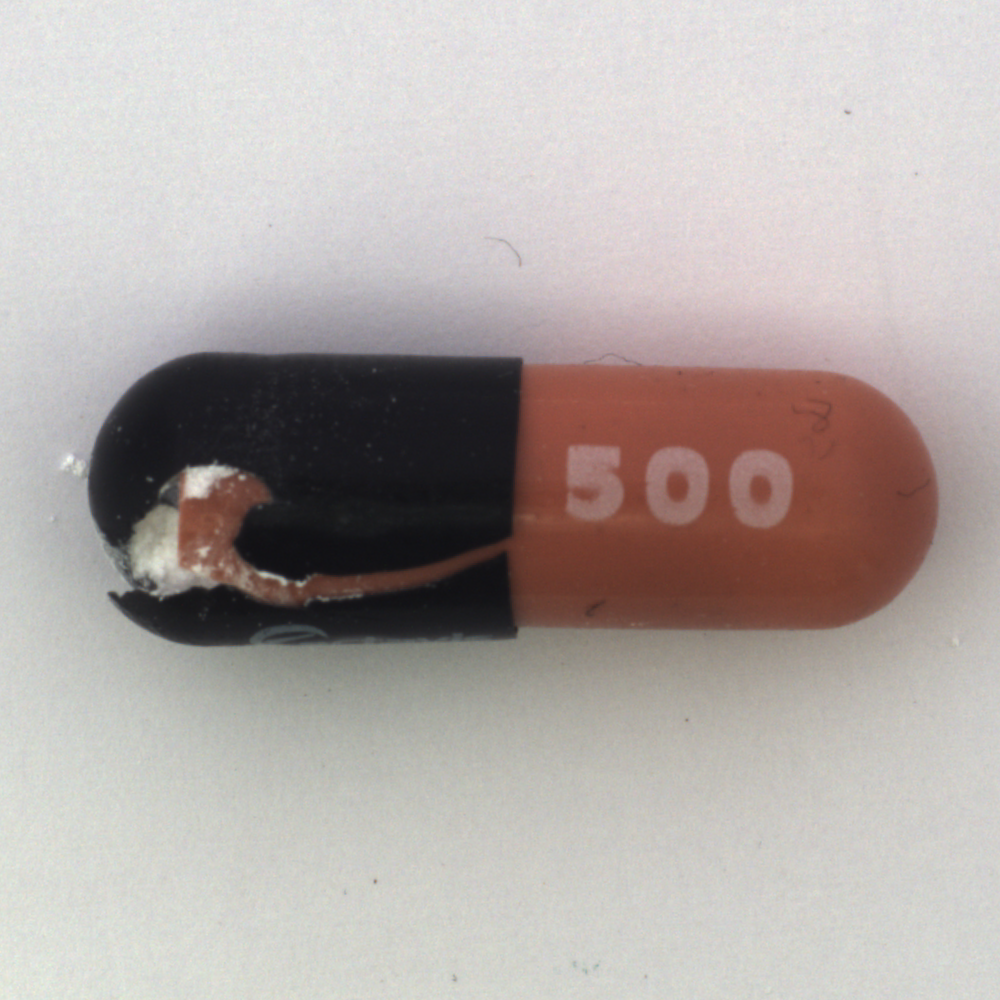

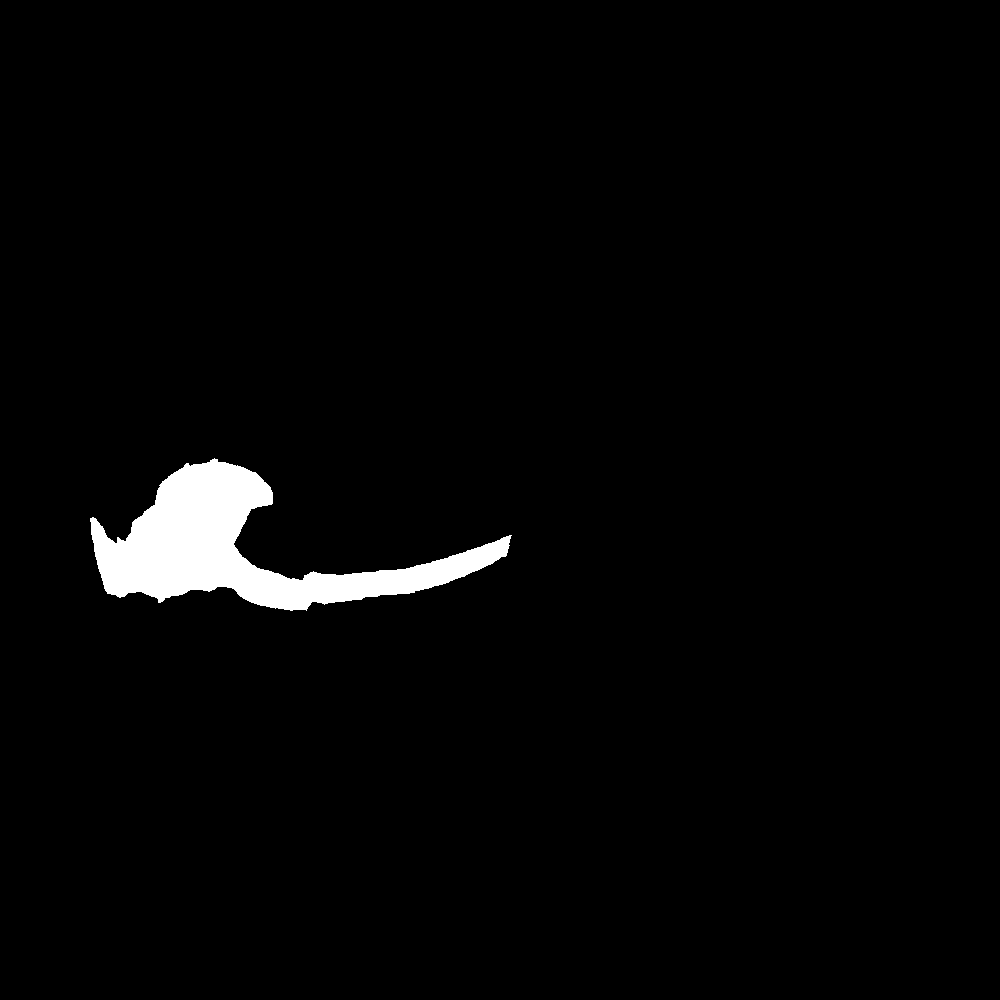

In [ ]:
def make_dataset(image_files, mask_files, batch_size=8, buffer_size=1000, target_size=(256, 256)):
    ds = tf.data.Dataset.from_tensor_slices((image_files, mask_files))

    def _load(image_path, mask_path):
        # Image
        image = tf.io.read_file(image_path)
        # Use channels=3 for RGB image
        image = tf.image.decode_image(image, channels=3, expand_animations=False)

        # Mask
        mask = tf.io.read_file(mask_path)
        # Mask is Grayscale (channels=1)
        mask = tf.image.decode_image(mask, channels=1, expand_animations=False)
        # Sometime decode_image doesn't return a clear shape:  set_shape is needed to prevent error in seme layer
        image.set_shape([None, None, 3])
        mask.set_shape([None, None, 1])

        image, mask = preprocess_image_mask(image, mask, target_size)
        return image, mask

    ds = ds.map(_load, num_parallel_calls=tf.data.AUTOTUNE)
    # ds = ds.shuffle(buffer_size)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)

    # Display  the Shape of training data
    for img, msk in ds.take(1):
        print("Image Batch Shape:", img.shape)
        print("Mask Batch Shape:", msk.shape)

    return ds


# Example to use U-Net

In [ ]:
#Example placeholders (replace with your file lists)
image_directory_path = 'D:/AI and CV course/Computer Vision Technology/Week8 Object Segmentation/capsule/test/crack'
mask_directory_path = 'D:\AI and CV course\Computer Vision Technology\Week8 Object Segmentation\capsule\ground_truth\crack'

all_images = os.listdir(image_directory_path)


train_images = [os.path.join(image_directory_path,item) for item in all_images if os.path.isfile(os.path.join(image_directory_path,item))]
train_masks = [os.path.join(mask_directory_path, item) for item in all_images if os.path.isfile(os.path.join(mask_directory_path, item))]


train_img, val_img, train_mask, val_mask = train_test_split(
    train_images, train_masks, test_size=0.2, random_state=42
)

print(train_images)
print(train_masks)

['D:/AI and CV course/Computer Vision Technology/Week8 Object Segmentation/capsule/test/crack\\000.png', 'D:/AI and CV course/Computer Vision Technology/Week8 Object Segmentation/capsule/test/crack\\001.png', 'D:/AI and CV course/Computer Vision Technology/Week8 Object Segmentation/capsule/test/crack\\002.png', 'D:/AI and CV course/Computer Vision Technology/Week8 Object Segmentation/capsule/test/crack\\003.png', 'D:/AI and CV course/Computer Vision Technology/Week8 Object Segmentation/capsule/test/crack\\004.png', 'D:/AI and CV course/Computer Vision Technology/Week8 Object Segmentation/capsule/test/crack\\005.png', 'D:/AI and CV course/Computer Vision Technology/Week8 Object Segmentation/capsule/test/crack\\006.png', 'D:/AI and CV course/Computer Vision Technology/Week8 Object Segmentation/capsule/test/crack\\007.png', 'D:/AI and CV course/Computer Vision Technology/Week8 Object Segmentation/capsule/test/crack\\008.png', 'D:/AI and CV course/Computer Vision Technology/Week8 Object Se

In [ ]:
if __name__ == '__main__':
    #Build model
    model = UNet(
        input_shape=(256, 256, 3),
        num_classes=1,
        base_filters=64,
        dropout=0.1,
        batch_norm=True
    )
    model = compile_unet(model, num_classes=1, lr=0.01)
    model.summary()


    train_ds = make_dataset(train_img, train_mask, batch_size=8, target_size=(256,256))

    val_ds = make_dataset(val_img, val_mask, batch_size=8, target_size=(256,256))



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 256, 256,  │      1,792 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_19[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_18       │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 256, 256,  │     36,928 │ activation_18[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_20[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_19       │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 128, 128,  │          0 │ activation_19[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 128, 128,  │          0 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 128, 128,  │     73,856 │ dropout_8[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_21[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_20       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 128, 128,  │    147,584 │ activation_20[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_22[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_21       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 64, 64,    │          0 │ activation_21[0]… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 64, 64,    │          0 │ max_pooling2d_5[

 Total params: 31,055,297 (118.47 MB)

 Trainable params: 31,043,521 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

Image Batch Shape: (8, 256, 256, 3)
Mask Batch Shape: (8, 256, 256, 1)
Image Batch Shape: (5, 256, 256, 3)
Mask Batch Shape: (5, 256, 256, 1)


In [ ]:
# callbacks = [tf.keras.callbacks.ModelCheckpoint('UNet.h5', save_best_only=True, monitor='val_loss')]
model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.3164 - dice_coefficient: 0.0116 - iou_metric: 0.0058 - loss: 1.0184 - val_accuracy: 0.7473 - val_dice_coefficient: 0.0105 - val_iou_metric: 0.0053 - val_loss: 4157025550336.0000
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.9926 - dice_coefficient: 0.0082 - iou_metric: 0.0041 - loss: 0.3700 - val_accuracy: 0.9890 - val_dice_coefficient: 2.7832e-10 - val_iou_metric: 2.7832e-10 - val_loss: 155688042496.0000
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.9951 - dice_coefficient: 0.0102 - iou_metric: 0.0051 - loss: 0.1569 - val_accuracy: 0.9946 - val_dice_coefficient: 5.6721e-10 - val_iou_metric: 5.6721e-10 - val_loss: 54739828736.0000
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.9951 - dice_coefficient: 0.0138 - iou_metric: 0.0069 - loss: 0.0867 - val_accuracy: 0.9946 - val_dice_coefficient: 5.6721e-10 - val_iou_metric: 5.6721e-10 - val_loss: 5392445952.0000
Epoch 5/10
3/3 ━━━━━━━

#Preprocess unseen Image and U-Net predict + plot

In [ ]:
def preprocess_single_image(image_directory_path, target_size=(256, 256)):
    image = tf.io.read_file(image_directory_path)

    image = tf.image.decode_image(image, channels=3, expand_animations=False)

    image = tf.image.resize(image, target_size, method='bilinear')

    image = tf.cast(image, tf.float32) / 255.0

    # Add dimantions Batch: จาก (256, 256, 3) -> (1, 256, 256, 3)
    # Model.predict needs the input on batch format
    image = tf.expand_dims(image, axis=0)

    return image

In [ ]:
import cv2
def plot_prediction(image, pred_mask):
    # Prepare image
    display_image = image[0].numpy()

    # Prepare Mask
    predict_mask = pred_mask[0]

    print(np.shape(display_image), predict_mask.shape) # Debug

    # Threshold and compress to 2 dimentions (H, W)
    mask_processed = (predict_mask > 0.85).astype(np.float32).squeeze()

    plt.figure(figsize=(10, 4))

    # Image Left: Mask (black and white)
    plt.subplot(1, 2, 1)
    # Display grayscale
    plt.imshow(mask_processed, cmap='gray')
    plt.title("Predicted Mask (Binary)")
    plt.axis("off")

    # Image Right: Overlay
    plt.subplot(1, 2, 2)
    # Display roginal image
    plt.imshow(display_image)

    # Top layer: Color Mask
    # Hides the all pixel that are 0 (blackground) so they don't obscure the actual image
    masked_overlay = np.ma.masked_where(mask_processed == 0, mask_processed)

    plt.imshow(masked_overlay, cmap="jet", alpha=0.5)
    plt.title("Predicted Mask Overlay")
    plt.axis("off")

In [ ]:
unseen_path = 'D:/AI and CV course/Computer Vision Technology/Week8 Object Segmentation/capsule/test/crack/001.png'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
(256, 256, 3) (256, 256, 1)


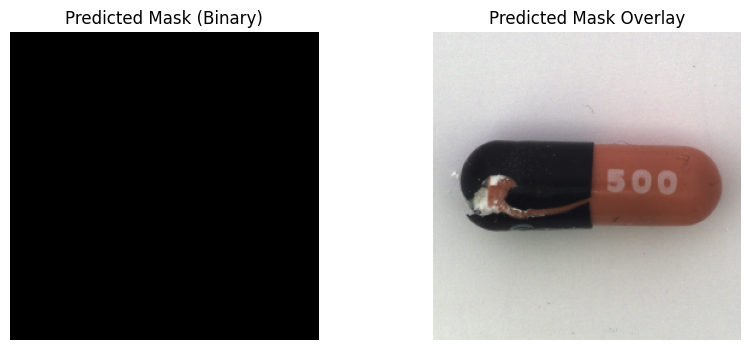

In [ ]:
unseen_image = preprocess_single_image(unseen_path)
pred_mask = model.predict(unseen_image)
plot_prediction(unseen_image, pred_mask)